In [2]:
#question 1 
# Anirudh Sathish 
# CS20B1125

1. Find and plot the decision boundary between class ω1 and ω2. Assume P(ω1) = P(ω2).
ω1 = [1,6; 3,4; 3,8; 5,6]
ω2 = [3,0; 1,-2;3,-4;5,-2]

In [3]:
# importing some neccesary libraries 
import numpy as np
import cv2
import matplotlib.pyplot as plt 
from sympy import solve 

In [4]:
# lets represent class w1
l1 = [[1,6],[3,4] ,[3,8],[ 5,6]]
w1 = np.array(l1)

# simmilarly class w2
l2 = [[3,0], [1,-2], [3,-4], [5,-2]]
w2 = np.array(l2)


In [5]:
# find covariance matrix of each of the classes 

cov_w1 = np.cov(w1.T)
cov_w2 = np.cov(w2.T)



In [6]:
# let us look at the covariance matrices to look at what case they satisfy 
print("Cov1 :\n")
print(cov_w1)
print("\nCov2 :\n")
print(cov_w2)

Cov1 :

[[2.66666667 0.        ]
 [0.         2.66666667]]

Cov2 :

[[2.66666667 0.        ]
 [0.         2.66666667]]


Since both the covarinance matrices are equal , this is case 1 

In [7]:
# let us find the mean 
mean_w1 = np.mean(w1,axis = 0 )
mean_w2 = np.mean(w2 , axis = 0 )
print(mean_w1,mean_w2)

[3. 6.] [ 3. -2.]


Now let us substitute the required formula 

In [8]:
# Let us obtain the value of sigma**2

# let us find dimension of covariance matrice 
dim = cov_w1.shape[0]
value = np.linalg.det(cov_w1)
sigma_square = (((value)**(1/dim)))

# let us round it to decimals 
sigma_square = np.round(sigma_square,2)
print(sigma_square)

2.67


In [9]:
# for calculating decision boundary 
from sympy import symbols , expand , Poly

x , y = symbols('x , y')
X = np.array([[x],[y]])
print(X)


[[x]
 [y]]


In [10]:
# now the formula -> g(x) = W_i.T*X+ W_i0

# for class w1 
W_w1 = np.round(mean_w1/(sigma_square),2)

#W0 term 
W0_w1 = np.round((((mean_w1.T) @ mean_w1)*-1)/(2*sigma_square),2)

# decision boundaring g(x) for class w1 
g_w1 = W_w1 @ X + W0_w1
poly_boundary_class_w1_part1  = Poly(g_w1[0])
print(g_w1)
print(poly_boundary_class_w1_part1)

[1.12*x + 2.25*y - 8.43]
Poly(1.12*x + 2.25*y - 8.43, x, y, domain='RR')


In [11]:
# now the formula -> g(x) = W_i.T*X+ W_i0

# for class w2 
W_w2 = np.round(mean_w2/(sigma_square),2)

#W0 term 
W0_w2 = np.round((((mean_w2.T) @ mean_w2)*-1)/(2*sigma_square),2)

# decision boundaring g(x) for class w2 
g_w2 = W_w2 @ X + W0_w2
poly_boundary_class_w2_part1  = Poly(g_w2[0])
print(g_w2)
print(poly_boundary_class_w2_part1)

[1.12*x - 0.75*y - 2.43]
Poly(1.12*x - 0.75*y - 2.43, x, y, domain='RR')


In [12]:
gx = g_w1 - g_w2
sol = solve(gx,y)
print("g(x): ",gx[0],"\n")
print(sol)

g(x):  3.0*y - 6.0 

{y: 2.00000000000000}


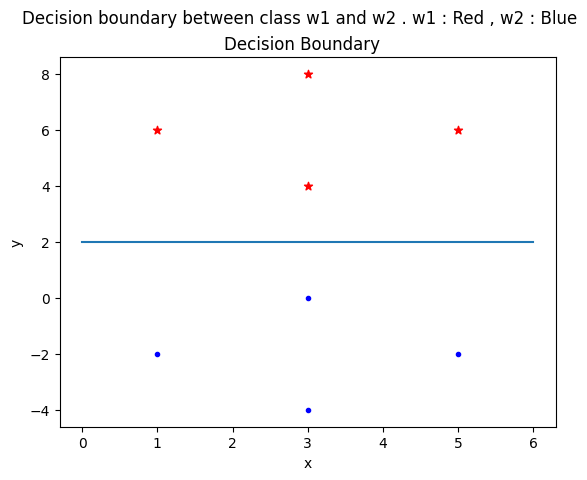

In [15]:
x_temp = np.linspace(0,6,100)
y_temp = 2 + 0*x_temp

plt.plot(x_temp,y_temp)
plt.scatter(w1[:,0],w1[:,1],color = 'red' , marker = '*')
plt.scatter(w2[:,0],w2[:,1],color = 'blue', marker = '.')

plt.xlabel("x")
plt.ylabel("y")
title = "Decision boundary between class w1 and w2 . w1 : Red , w2 : Blue"
plt.suptitle(title)
plt.title('Decision Boundary  ')
plt.show()